In [12]:
# STEP 1: Import pandas
import pandas as pd

# STEP 2: Read the uploaded CSV file
df = pd.read_csv("/content/final_perfume_data.csv", encoding='ISO-8859-1')

# STEP 3: Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])

# STEP 4: Check cleaned dataset info
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2191 non-null   object
 1   Brand        2191 non-null   object
 2   Description  2191 non-null   object
 3   Notes        2111 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


# New Section

In [17]:
# A1: Count missing values in each column
print("Missing values per column:")
print(df_cleaned.isnull().sum())

# A2: Drop rows where 'Notes' is missing
df_cleaned = df_cleaned.dropna(subset=['Notes'])

# B1: Count perfumes per brand
brand_counts = df_cleaned['Brand'].value_counts()

# B2: Display top 10 brands
print("\nTop 10 brands by number of perfumes:")
print(brand_counts.head(10))


Missing values per column:
Name            0
Brand           0
Description     0
Notes          80
dtype: int64

Top 10 brands by number of perfumes:
Brand
Serge Lutens              36
TOM FORD Private Blend    36
BYREDO                    34
L'Artisan Parfumeur       34
PARFUMS DE NICOLAI        33
Montale                   33
Xerjoff                   33
Profumum                  32
Le Labo                   32
Fragrance du Bois         31
Name: count, dtype: int64


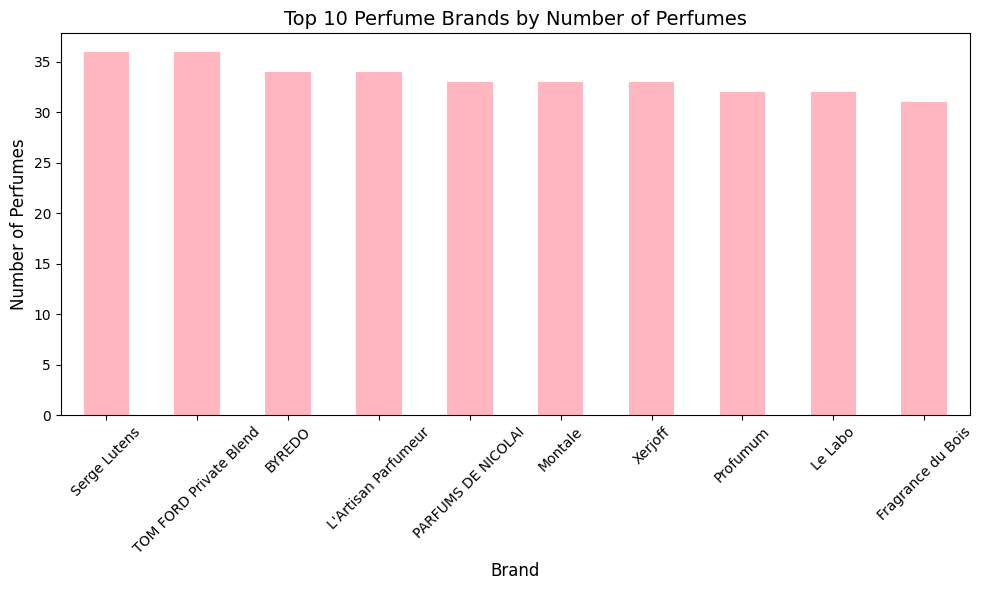

In [18]:
# STEP 1: Import the plotting library
import matplotlib.pyplot as plt

# STEP 2: Prepare top 10 brands data
top_10_brands = brand_counts.head(10)

# STEP 3: Create a bar chart
plt.figure(figsize=(10, 6))  # Set the chart size (width, height)
top_10_brands.plot(kind='bar', color='lightpink')

# STEP 4: Add chart title and labels
plt.title('Top 10 Perfume Brands by Number of Perfumes', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# STEP 5: Show the chart
plt.tight_layout()
plt.show()


In [19]:
# STEP 1: Make all notes lowercase for consistency (Vanilla vs vanilla)
df_cleaned['Notes'] = df_cleaned['Notes'].str.lower()

# STEP 2: Split the notes by comma and strip extra spaces
all_notes = df_cleaned['Notes'].str.split(',').explode()
all_notes = all_notes.str.strip()  # remove leading/trailing spaces

# STEP 3: Count each unique note
note_counts = all_notes.value_counts()

# STEP 4: Show the top 15 notes
print("Top 15 most common fragrance notes:")
print(note_counts.head(15))


Top 15 most common fragrance notes:
Notes
musk          537
patchouli     512
vanilla       506
sandalwood    504
bergamot      502
amber         463
rose          364
jasmine       362
vetiver       328
cedar         297
leather       214
incense       206
lemon         193
cardamom      191
saffron       171
Name: count, dtype: int64


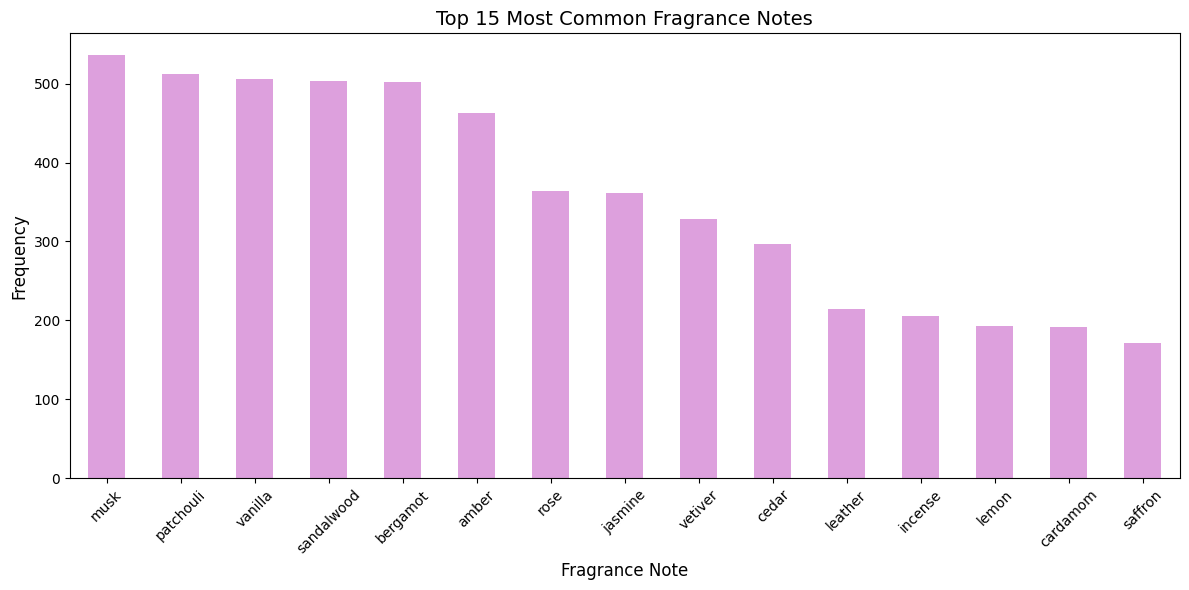

In [20]:
# STEP 1: Prepare top 15 notes
top_15_notes = note_counts.head(15)

# STEP 2: Plot
plt.figure(figsize=(12, 6))  # make the chart wider
top_15_notes.plot(kind='bar', color='plum')

# STEP 3: Labels and title
plt.title("Top 15 Most Common Fragrance Notes", fontsize=14)
plt.xlabel("Fragrance Note", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)  # rotate labels for readability

# STEP 4: Show it
plt.tight_layout()
plt.show()


In [21]:
# STEP 1: Install wordcloud (only needed once)
!pip install wordcloud

# STEP 2: Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


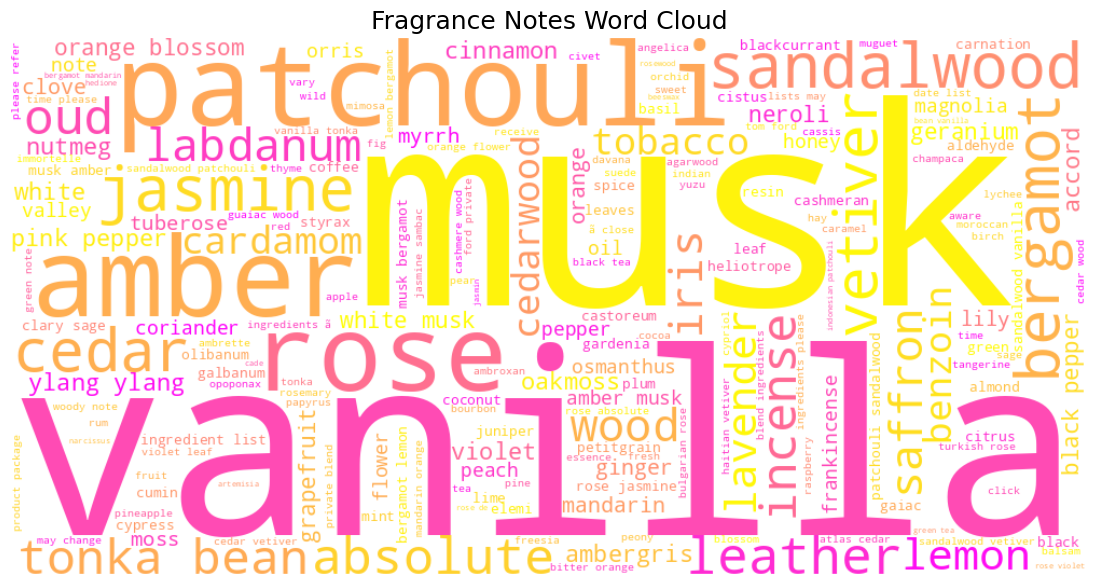

In [22]:
# STEP 3: Combine all notes into one big string
note_text = ' '.join(all_notes.dropna())  # dropna just in case

# STEP 4: Create the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='spring').generate(note_text)

# STEP 5: Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # remove axes
plt.title("Fragrance Notes Word Cloud", fontsize=18)
plt.show()


In [23]:
# Step 1: Make sure notes are lowercase and clean
df_cleaned['Notes'] = df_cleaned['Notes'].str.lower().str.strip()

# Step 2: Create a version of the Notes column split into lists
df_cleaned['Note_List'] = df_cleaned['Notes'].str.split(',').apply(lambda x: [i.strip() for i in x])


In [24]:

def recommend_perfumes(note_keywords):

    note_keywords = [note.strip().lower() for note in note_keywords]

    matching_perfumes = df_cleaned[df_cleaned['Note_List'].apply(
        lambda notes: all(keyword in notes for keyword in note_keywords)
    )]
    return matching_perfumes[['Name', 'Brand', 'Notes']].head(10)


In [25]:
# Example 1: Vanilla & Musk
recommend_perfumes(["vanilla", "musk"])


,Name,Brand,Notes
3,Velvet Fantasy Eau de Parfum,Montale,"tangerine, pink pepper, black coffee, leath..."
12,Koala Extrait de Parfum,Zoologist,"eucalyptus, menthol honey gumdrops, mimosa, bl..."
21,Milk Musk Eau de Toilette,Molton Brown,"pear, peach, musk, ambroxan, vanilla, white ce..."
69,Transilvania Extrait de Parfum,CALAJ Perfumes,"black cherry, rose oxyde, angelica, jasmine, t..."
70,Love Toxin Extrait de Parfum,CALAJ Perfumes,"bergamot, coriander, plum, coconut, strawberry..."
78,Oud Stars - Indochine Parfum,Xerjoff,"brasilian orange, strawberry, pink pepper, fre..."
93,Gold II Sahara Parfum Extrait,Widian,"saffron, orange, elemi, rose, orange blossom, ..."
107,Cornaline Eau de Parfum,Anatole Lebreton,"carrot root, geranium, orris, ylang ylang, pea..."
113,London Eau de Parfum,Widian,"oud, cypress, violet, lily of the valley, rasp..."
128,La Cautiva Eau de Parfum,Fueguia 1833,"musk, blackcurrant, vanilla"


In [26]:
recommend_perfumes(["rose"])

,Name,Brand,Notes
10,Nocturnal Poetry Parfum,PRIN,"violet, champaca, rosewood, beeswax, frankince..."
14,Rozu Eau de Parfum,Aesop,"rose, shiso, guaiac"
16,Prends-Moi Eau de Parfum,Isabey,"bergamot, pink pepper, raspberry, rose, red sa..."
25,Puritas Eau de Parfum,Electimuss,"elemi, pink pepper, absinthe, olibanum, rose, ..."
26,Thurible Eau de Parfum,Rook Perfumes,"clove, ash, sage, black pepper, labdanum, ince..."
56,Young Hearts Eau de Parfum,Bruno Acampora,"bergamot, galbanum, birch leaf, pine, saffron,..."
68,Black Beard Extrait de Parfum,CALAJ Perfumes,"orange, bergamot, petitgrain, artemisia, basil..."
70,Love Toxin Extrait de Parfum,CALAJ Perfumes,"bergamot, coriander, plum, coconut, strawberry..."
71,Oshun Extrait de Parfum,CALAJ Perfumes,"lemon, cinnamon, black pepper, pine, black ..."
75,Magnolia Grandiflora - Michel Eau de Parfum,Grandiflora,"lemon, bergamot, grapefruit, jasmine, ylang-yl..."


In [27]:
# New function: Recommend perfumes with ANY of the given notes
def recommend_any_note(note_keywords):
    # Clean the input (make lowercase, remove spaces)
    note_keywords = [note.strip().lower() for note in note_keywords]

    # Find perfumes where at least one note matches
    matching_perfumes = df_cleaned[df_cleaned['Note_List'].apply(
        lambda notes: any(keyword in notes for keyword in note_keywords)
    )]

    # Show only the useful columns
    return matching_perfumes[['Name', 'Brand', 'Notes']].head(10)


In [28]:

recommend_any_note(["vanilla", "rose"])


,Name,Brand,Notes
3,Velvet Fantasy Eau de Parfum,Montale,"tangerine, pink pepper, black coffee, leath..."
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,"bergamot, almond, violet, jasmine, leather, sa..."
10,Nocturnal Poetry Parfum,PRIN,"violet, champaca, rosewood, beeswax, frankince..."
12,Koala Extrait de Parfum,Zoologist,"eucalyptus, menthol honey gumdrops, mimosa, bl..."
14,Rozu Eau de Parfum,Aesop,"rose, shiso, guaiac"
16,Prends-Moi Eau de Parfum,Isabey,"bergamot, pink pepper, raspberry, rose, red sa..."
21,Milk Musk Eau de Toilette,Molton Brown,"pear, peach, musk, ambroxan, vanilla, white ce..."
25,Puritas Eau de Parfum,Electimuss,"elemi, pink pepper, absinthe, olibanum, rose, ..."
26,Thurible Eau de Parfum,Rook Perfumes,"clove, ash, sage, black pepper, labdanum, ince..."
29,Interlude Black Iris Eau de Parfum,Amouage,"bergamot, rosemary, violet leaves, orris, ambe..."


In [31]:
def recommend_similar_perfumes(perfume_name):
    # Step 1: Make sure perfume exists
    perfume_row = df_cleaned[df_cleaned['Name'].str.lower() == perfume_name.lower()]

    if perfume_row.empty:
        return f"No perfume found with the name '{perfume_name}'. Please check spelling."

    # Step 2: Get the notes of the input perfume
    target_notes = perfume_row.iloc[0]['Note_List']

    # Step 3: Compare to all other perfumes (except itself)
    df_cleaned['Similarity_Score'] = df_cleaned['Note_List'].apply(
        lambda notes: len(set(notes).intersection(set(target_notes)))
    )

    # Step 4: Filter out the input perfume itself
    similar_perfumes = df_cleaned[df_cleaned['Name'].str.lower() != perfume_name.lower()]

    # Step 5: Sort by similarity score
    similar_perfumes = similar_perfumes.sort_values(by='Similarity_Score', ascending=False)

    # Step 6: Show top 10
    return similar_perfumes[['Name', 'Brand', 'Notes', 'Similarity_Score']].head(10)


In [32]:
recommend_similar_perfumes("Velvet Fantasy Eau de Parfum")


,Name,Brand,Notes,Similarity_Score
1738,Chambre Noire Eau de Parfum,Olfactive Studio,"pink pepper, jasmine, papyrus (cypriol), viole...",7
1277,Diaghilev Extrait de Parfum,Roja Parfums,"bergamot, lemon, lime, orange, tarragon, black...",7
1429,Halfeti Eau de Parfum,Penhaligons,"grapefruit, bergamot, green notes, armoise, la...",7
740,Elixir Pour Femme Extrait de Parfum,Roja Parfums,"bergamot, lily of the valley, geranium, rose d...",6
1028,Eau My Soul Eau de Parfum,4160 Tuesdays,"bergamot, lavender, honey, frankincense, cogna...",6
1190,Musc Gold Extrait Parfum Extrait,Bruno Acampora,"musk, honeyed florals, neroli, rose, jasmine, ...",6
515,Danger Parfum Cologne,Roja Parfums,"lemon, bergamot, lavender, tarragon, lily of t...",6
1038,Elysium Pour Homme Extrait de Parfum,Roja Parfums,"lemon, bergamot, grapefruit, lime, lavender, t...",6
1189,Musc Gold Perfume Oil,Bruno Acampora,"musk, honeyed florals, neroli, rose, jasmine, ...",6
729,Black Leather Eau de Parfum,J-Scent,"leather, bergamot, tobacco, jasmine, oakmoss, ...",6


In [34]:
def recommend_similar_perfumes_with_percent(perfume_name):
    # Step 1: Find the perfume by name
    perfume_row = df_cleaned[df_cleaned['Name'].str.lower() == perfume_name.lower()]

    if perfume_row.empty:
        return f"No perfume found with the name '{perfume_name}'. Please check spelling."

    # Step 2: Get the target perfume's notes
    target_notes = perfume_row.iloc[0]['Note_List']
    target_note_count = len(target_notes)

    # Step 3: Compare to all other perfumes
    df_cleaned['Similarity_Score'] = df_cleaned['Note_List'].apply(
        lambda notes: len(set(notes).intersection(set(target_notes)))
    )

    # Step 4: Calculate similarity percentage
    df_cleaned['Similarity_Percent'] = round((df_cleaned['Similarity_Score'] / target_note_count) * 100, 1)

    # Step 5: Exclude the perfume itself
    similar_perfumes = df_cleaned[df_cleaned['Name'].str.lower() != perfume_name.lower()]

    # Step 6: Sort by percentage
    similar_perfumes = similar_perfumes.sort_values(by='Similarity_Percent', ascending=False)

    # Step 7: Show top 10 matches
    return similar_perfumes[['Name', 'Brand', 'Notes', 'Similarity_Score', 'Similarity_Percent']].head(10)


In [35]:
recommend_similar_perfumes_with_percent("Velvet Fantasy Eau de Parfum")


,Name,Brand,Notes,Similarity_Score,Similarity_Percent
1738,Chambre Noire Eau de Parfum,Olfactive Studio,"pink pepper, jasmine, papyrus (cypriol), viole...",7,50.0
1277,Diaghilev Extrait de Parfum,Roja Parfums,"bergamot, lemon, lime, orange, tarragon, black...",7,50.0
1429,Halfeti Eau de Parfum,Penhaligons,"grapefruit, bergamot, green notes, armoise, la...",7,50.0
740,Elixir Pour Femme Extrait de Parfum,Roja Parfums,"bergamot, lily of the valley, geranium, rose d...",6,42.9
1028,Eau My Soul Eau de Parfum,4160 Tuesdays,"bergamot, lavender, honey, frankincense, cogna...",6,42.9
1190,Musc Gold Extrait Parfum Extrait,Bruno Acampora,"musk, honeyed florals, neroli, rose, jasmine, ...",6,42.9
515,Danger Parfum Cologne,Roja Parfums,"lemon, bergamot, lavender, tarragon, lily of t...",6,42.9
1038,Elysium Pour Homme Extrait de Parfum,Roja Parfums,"lemon, bergamot, grapefruit, lime, lavender, t...",6,42.9
1189,Musc Gold Perfume Oil,Bruno Acampora,"musk, honeyed florals, neroli, rose, jasmine, ...",6,42.9
729,Black Leather Eau de Parfum,J-Scent,"leather, bergamot, tobacco, jasmine, oakmoss, ...",6,42.9


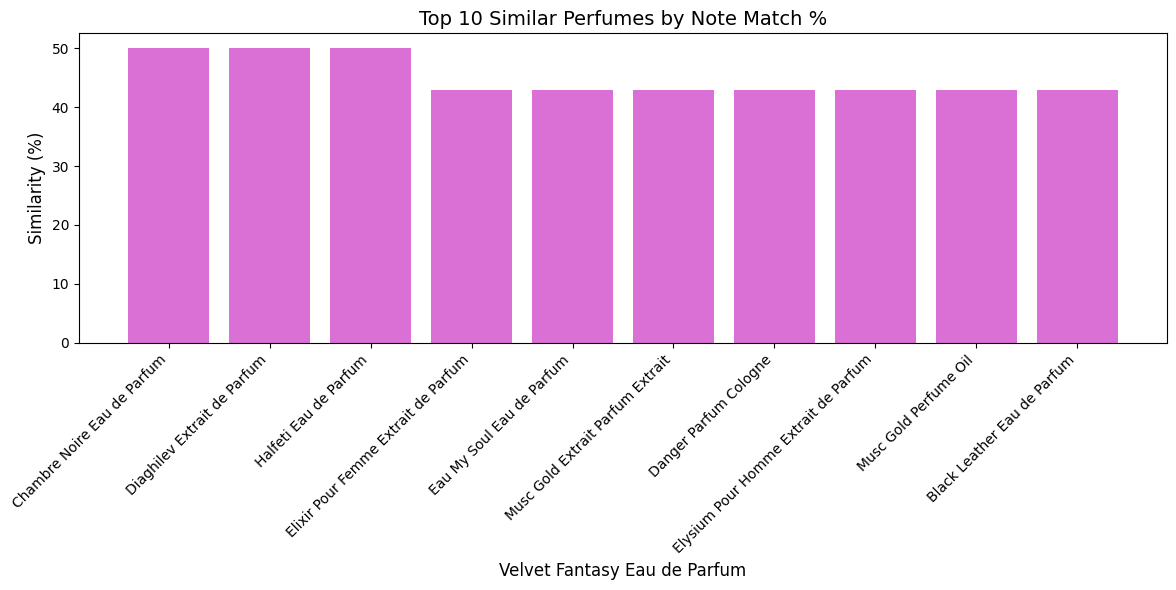

In [39]:
import matplotlib.pyplot as plt

# Call the function and save results
results = recommend_similar_perfumes_with_percent("Velvet Fantasy Eau de Parfum")

# Plot the similarity %
plt.figure(figsize=(12, 6))
plt.bar(results['Name'], results['Similarity_Percent'], color='orchid')

# Add labels and title
plt.title("Top 10 Similar Perfumes by Note Match %", fontsize=14)
plt.xlabel("Velvet Fantasy Eau de Parfum", fontsize=12)
plt.ylabel("Similarity (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Tilt names to prevent overlap

# Show the graph
plt.tight_layout()
plt.show()
